In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <span style="color:#ffcc33">This notebook contains descriptive statistics and analyses generated for the Data Watch paper for the University of Minnesota's MILI 6963 Fall 2019 course.</span>
    
# <span style="color:#ffcc33">The analyses were created using data generated using SAS code from the course.  This notebook is not for public consumption and should not be used in any other context than to review the code and the visualizations that were generated for the paper.</span>

# <span style="color:#ffcc33">Please do not reproduce or republish this code without written consent of the author below.</span>

- <b>Course</b>: <i>MILI 6963 - Healthcare Analytics</i>
- <b>Semester</b>: <i>Fall 2019</i>
- <b>Author</b>: <i>Danny Moncada, University of Minnesota - Office of Human Resources - Data & Reporting Analyst</i>

In [2]:
## Import the necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os

In [73]:
## Ignore silly pandas warnings if they pop up

import warnings
warnings.filterwarnings("ignore")

In [74]:
## Show the Python environment details

print("Here are the environment details...")
print()
print(sys.executable)
print(sys.version)
print(sys.version_info)

## Show the different versions for each library used in the Python exploration
print()
print("This notebook is using pandas version: {}.".format(pd.__version__))
print("This notebook is using numpy version: {}.".format(np.__version__))
print("This notebook is using seaborn version: {}.".format(sns.__version__))
print("This notebook is using matplotlib version: {}.".format(matplotlib.__version__))

Here are the environment details...

C:\Python\envs\MSBA2020\python.exe
3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)

This notebook is using pandas version: 0.25.3.
This notebook is using numpy version: 1.16.4.
This notebook is using seaborn version: 0.9.0.
This notebook is using matplotlib version: 3.1.2.


In [5]:
## Load the CT/NY files

ctny_week3_file = "WEEK3D_HCAlytics_2018_DM_CTNY.XLSX"
ctny_week5_file = "WEEK5_HCAlytics_2019_DM_CTNY.XLSX"

In [6]:
## Load the MN/WI files

mnwi_week3_file = "WEEK3D_HCAlytics_2018_DM_MNWI.XLSX"
mnwi_week5_file = "WEEK5_HCAlytics_2019_DM_MNWI.XLSX"

# <span style="color:#7a0019">A. Visualizating medical care cost and patient finanical burden in Connecticut & New York compared to Minnesota & Wisconsin

In [126]:
### Load in the week 5 SAS Proto output

ct_patient_burden_df = pd.read_excel(ctny_week5_file)
mn_patient_burden_df = pd.read_excel(mnwi_week5_file)

In [127]:
ct_patient_burden_df.dtypes

_NAME_      object
_LABEL_     object
COL1       float64
COL2       float64
COL3       float64
COL4       float64
COL5       float64
COL6       float64
dtype: object

In [128]:
## Re-label our column names

col_names = ["Group", "Label", "All Patients", "Employer ESI", "Medicare FFS", "Medicaid", "Medicaid MA", "Under 65 Non-Group"]

In [130]:
## Rename our column names

ct_patient_burden_df.columns = df_names
mn_patient_burden_df.columns = df_names

In [252]:
## Just viewing the last few rows of the table to confirm it loaded correctly
## And that all the renamed columns came through correctly

ct_patient_burden_df.tail()

,Group,Label,All Patients,Employer ESI,Medicare FFS,Medicaid,Medicaid MA,Under 65 Non-Group
24,S_BS1_5,"Total Patient Burden: $1,000 to <$5,000 =1, E...",3229429,1571868,630511,711383,251561,64103
25,S_BS510,"Total Patient Burden: $5,000 to <$10,000 =1, ...",244726,59803,119371,45178,13358,7015
26,S_BS1030,"Total Patient Burden: $10,000 to <$30,000 =1,...",71663,10849,57278,3276,0,259
27,S_BSGT30,"Total Patient Burden: $30,000+ =1, ELSE 0",7017,1202,5815,0,0,0
28,OTHER,unknown,3206405,1920263,299737,839889,43863,102653


In [253]:
## All our values came in as floating point - these are no bueno
## We'll create a dictionary to convert the values

conversion_dict = {
    "All Patients": int,
    "Employer ESI": int,
    "Medicare FFS": int,
    "Medicaid": int,
    "Medicaid MA": int,
    "Under 65 Non-Group": int
}

## Convert to more appropriate types for plotting on both dataframes
ct_patient_burden_df = ct_patient_burden_df.astype(conversion_dict)

mn_patient_burden_df = mn_patient_burden_df.astype(conversion_dict)

In [254]:
## Confirm that the manipulation above was successful

mn_patient_burden_df.tail(6)

,Group,Label,All Patients,Employer ESI,Medicare FFS,Medicaid,Medicaid MA,Under 65 Non-Group
23,S_BS_01,"Total Patient Burden: < $1,000 =1, ELSE 0",8626989,4825441,870615,1688025,923984,318923
24,S_BS1_5,"Total Patient Burden: $1,000 to <$5,000 =1, E...",2319466,1049857,520934,432852,242587,73233
25,S_BS510,"Total Patient Burden: $5,000 to <$10,000 =1, ...",246298,44787,134279,30492,18220,18518
26,S_BS1030,"Total Patient Burden: $10,000 to <$30,000 =1,...",61162,3129,53729,3108,667,528
27,S_BSGT30,"Total Patient Burden: $30,000+ =1, ELSE 0",2682,0,2682,0,0,0
28,OTHER,unknown,2152845,1171733,275066,449051,76890,180104


In [255]:
## First, we'll split this initial dataframe into two tables
## We can calculate percentages pretty quickly - and then plot the percentags and the number of patients for each group

ct_patient_subset_df = ct_patient_burden_df.tail(6)

In [256]:
## Generate a list needed to calculate the percentages for CT/NY

ct_patient_burden_df.iloc[15]

Group                  S_EVERY
Label                      NaN
All Patients          20775896
Employer ESI          12469437
Medicare FFS           1968622
Medicaid               4754550
Medicaid MA            1152341
Under 65 Non-Group      430943
Name: 15, dtype: object

In [257]:
## Here we create percentages for all of the groups - so when we compare, we can compare not just count of patients but the percentage
## Maybe the population/count of patients have something to do with it

ct_patient_subset_df["All Patients (%)"] = round((ct_patient_subset_df["All Patients"] / 20775896) * 100, 2)
ct_patient_subset_df["Employer ESI (%)"] = round((ct_patient_subset_df["Employer ESI"] / 12469437) * 100, 2)
ct_patient_subset_df["Medicare FFS (%)"] = round((ct_patient_subset_df["Medicare FFS"] / 1968622) * 100, 2)
ct_patient_subset_df["Medicaid (%)"] = round((ct_patient_subset_df["Medicaid"] / 4754550) * 100, 2)
ct_patient_subset_df["Medicaid MA (%)"] = round((ct_patient_subset_df["Medicaid MA"] / 1152341) * 100, 2)
ct_patient_subset_df["Under 65 Non-Group (%)"] = round((ct_patient_subset_df["Under 65 Non-Group"] / 430943) * 100, 2)

In [258]:
##  Now we can see the full table - we can use this to plot and compare to MN/WI

ct_patient_subset_df

,Group,Label,All Patients,Employer ESI,Medicare FFS,Medicaid,Medicaid MA,Under 65 Non-Group,All Patients (%),Employer ESI (%),Medicare FFS (%),Medicaid (%),Medicaid MA (%),Under 65 Non-Group (%)
23,S_BS_01,"Total Patient Burden: < $1,000 =1, ELSE 0",14016654,8905450,855909,3154823,843558,256912,67.47,71.42,43.48,66.35,73.20,59.62
24,S_BS1_5,"Total Patient Burden: $1,000 to <$5,000 =1, E...",3229429,1571868,630511,711383,251561,64103,15.54,12.61,32.03,14.96,21.83,14.88
25,S_BS510,"Total Patient Burden: $5,000 to <$10,000 =1, ...",244726,59803,119371,45178,13358,7015,1.18,0.48,6.06,0.95,1.16,1.63
26,S_BS1030,"Total Patient Burden: $10,000 to <$30,000 =1,...",71663,10849,57278,3276,0,259,0.34,0.09,2.91,0.07,0.00,0.06
27,S_BSGT30,"Total Patient Burden: $30,000+ =1, ELSE 0",7017,1202,5815,0,0,0,0.03,0.01,0.30,0.00,0.00,0.00
28,OTHER,unknown,3206405,1920263,299737,839889,43863,102653,15.43,15.40,15.23,17.66,3.81,23.82


In [259]:
## First, we will see how much each group contributes to the different levels of spend
## Curious to see the difference between the two

ct_totals = [i+j+k+l+m for i, j, k, l, m in zip(ct_patient_subset_df["Employer ESI"], 
                                             ct_patient_subset_df["Medicare FFS"],
                                            ct_patient_subset_df["Medicaid"],
                                            ct_patient_subset_df["Medicaid MA"],
                                            ct_patient_subset_df["Under 65 Non-Group"])]

## Show the totals to confirm our function above was successful
ct_totals

[14016652, 3229426, 244725, 71662, 7017, 3206405]

In [260]:
## We'll generate two sets of plots - to show the percentage difference between the two areas
## And then also bar graphs showing a comparison for each group

## We go through all of the columns that we want to plot and transform them into percentages
## So that when stack them all together, we will add up to 100%
## Then we can see how much each group contributes to the different spending categories

ct_blue = [i / j * 100 for i, j, in zip(ct_patient_subset_df["Employer ESI"], ct_totals)]
ct_orange = [i / j * 100 for i, j in zip(ct_patient_subset_df["Medicare FFS"], ct_totals)]
ct_green = [i / j * 100 for i, j in zip(ct_patient_subset_df["Medicaid"], ct_totals)]
ct_purple = [i / j * 100 for i, j in zip(ct_patient_subset_df["Medicaid MA"], ct_totals)]
ct_red = [i / j * 100 for i, j in zip(ct_patient_subset_df["Under 65 Non-Group"], ct_totals)]

In [273]:
## Create a list for the labels for the graph

patient_burden_labels = ["Under $1000", "\$1000 to $4,999", "\$5000 to $9,999", "\$10,000 to $29,999", "More than $30,000", "Unknown Patient Cost"]

## We create a list for each category of spend we want to plot
r = [0, 1, 2, 3, 4, 5]

## Create a range of number using our labels list
x_labs = np.arange(len(patient_burden_labels))

## Set the barwidth to a standard size
barwidth = 0.85

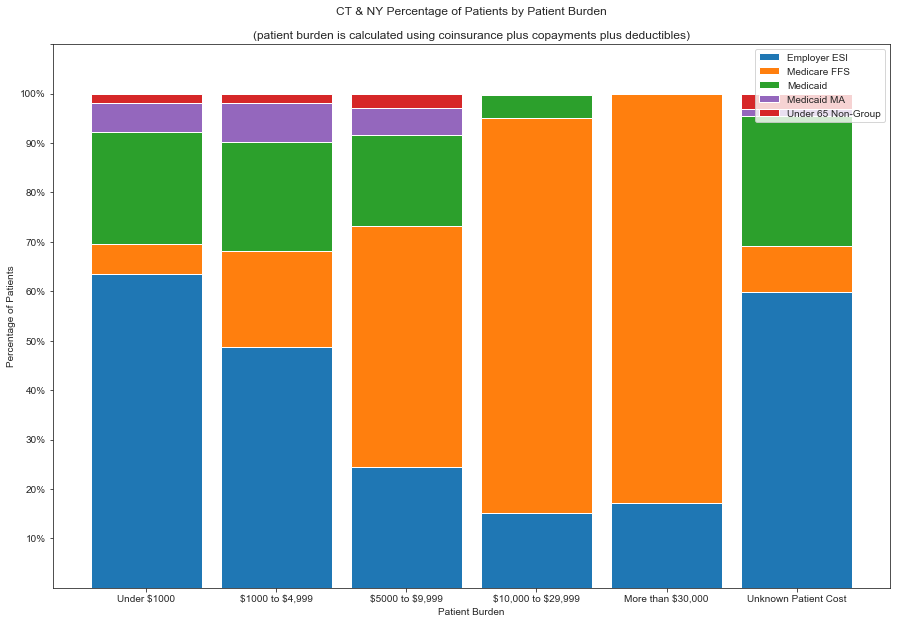

In [274]:
## Generate the first plot to display CT & NY percentage of patients by patient burden
## Create a new figure to plot with
plt.figure(1, figsize = (15, 10))

## Plot each group, stacking them one on top of the other; we label each one so we can distinguish between them
plt.bar(r, ct_blue, color = "tab:blue", edgecolor = "white", width = barwidth, label = "Employer ESI")
plt.bar(r, ct_orange, bottom = ct_blue, color = "tab:orange", edgecolor= "white", width = barwidth, label = "Medicare FFS")
plt.bar(r, ct_green, bottom = [i+j for i,j in zip(ct_blue, ct_orange)], color = "tab:green", edgecolor = "white", width=barwidth, label = "Medicaid")
plt.bar(r, ct_purple, bottom = [i+j+k for i,j,k in zip(ct_blue, ct_orange, ct_green)], color = "tab:purple", edgecolor = "white", width=barwidth, label = "Medicaid MA")
plt.bar(r, ct_red, bottom = [i+j+k+l for i,j,k,l in zip(ct_blue, ct_orange, ct_green, ct_purple)], color = "tab:red", edgecolor = "white", width = barwidth, label = "Under 65 Non-Group")

## Create an axes object so we can change some settings below to provide more clarity on the information being displayed
ax = plt.gca()

ax.set_xticks(x_labs)
ax.set_xticklabels(patient_burden_labels)
ax.set_xlabel("Patient Burden")

ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
ax.set_yticklabels(["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%", " "])
ax.set_ylabel("Percentage of Patients")

ax.tick_params(left = True, bottom = True)

plt.title("CT & NY Percentage of Patients by Patient Burden\n\n(patient burden is calculated using coinsurance plus copayments plus deductibles)")

plt.legend(loc = "upper right")

plt.show()

# <span style="color:#7a0019">We will generate a similar plot for the MN & WI group as well so that we can use this as a comparison.

In [275]:
## Generate a list needed to calculate the percentages for MN/WI

mn_patient_burden_df.iloc[15]

Group                  S_EVERY
Label                      NaN
All Patients          13409445
Employer ESI           7094948
Medicare FFS           1857308
Medicaid               2603529
Medicaid MA            1262351
Under 65 Non-Group      591307
Name: 15, dtype: object

In [276]:
## First, we'll split this initial dataframe into two tables
## We can calculate percentages pretty quickly - and then plot the percentags and the number of patients for each group

mn_patient_subset_df = mn_patient_burden_df.tail(6)

In [277]:
## Here we create percentages for all of the groups - so when we compare, we can compare not just count of patients but the percentage
## Maybe the population/count of patients have something to do with it

mn_patient_subset_df["All Patients (%)"] = round((mn_patient_subset_df["All Patients"] / 13409445) * 100, 2)
mn_patient_subset_df["Employer ESI (%)"] = round((mn_patient_subset_df["Employer ESI"] / 7094948) * 100, 2)
mn_patient_subset_df["Medicare FFS (%)"] = round((mn_patient_subset_df["Medicare FFS"] / 1857308) * 100, 2)
mn_patient_subset_df["Medicaid (%)"] = round((mn_patient_subset_df["Medicaid"] / 2603529) * 100, 2)
mn_patient_subset_df["Medicaid MA (%)"] = round((mn_patient_subset_df["Medicaid MA"] / 1262351) * 100, 2)
mn_patient_subset_df["Under 65 Non-Group (%)"] = round((mn_patient_subset_df["Under 65 Non-Group"] / 591307) * 100, 2)

In [278]:
mn_patient_subset_df

,Group,Label,All Patients,Employer ESI,Medicare FFS,Medicaid,Medicaid MA,Under 65 Non-Group,All Patients (%),Employer ESI (%),Medicare FFS (%),Medicaid (%),Medicaid MA (%),Under 65 Non-Group (%)
23,S_BS_01,"Total Patient Burden: < $1,000 =1, ELSE 0",8626989,4825441,870615,1688025,923984,318923,64.34,68.01,46.88,64.84,73.20,53.94
24,S_BS1_5,"Total Patient Burden: $1,000 to <$5,000 =1, E...",2319466,1049857,520934,432852,242587,73233,17.30,14.80,28.05,16.63,19.22,12.38
25,S_BS510,"Total Patient Burden: $5,000 to <$10,000 =1, ...",246298,44787,134279,30492,18220,18518,1.84,0.63,7.23,1.17,1.44,3.13
26,S_BS1030,"Total Patient Burden: $10,000 to <$30,000 =1,...",61162,3129,53729,3108,667,528,0.46,0.04,2.89,0.12,0.05,0.09
27,S_BSGT30,"Total Patient Burden: $30,000+ =1, ELSE 0",2682,0,2682,0,0,0,0.02,0.00,0.14,0.00,0.00,0.00
28,OTHER,unknown,2152845,1171733,275066,449051,76890,180104,16.05,16.52,14.81,17.25,6.09,30.46


In [279]:
## We use the same function that we generated above

mn_totals = [i+j+k+l+m for i, j, k, l, m in zip(mn_patient_subset_df["Employer ESI"], 
                                             mn_patient_subset_df["Medicare FFS"],
                                            mn_patient_subset_df["Medicaid"],
                                            mn_patient_subset_df["Medicaid MA"],
                                            mn_patient_subset_df["Under 65 Non-Group"])]

mn_totals

[8626988, 2319463, 246296, 61161, 2682, 2152844]

In [280]:
mn_blue = [i / j * 100 for i, j, in zip(mn_patient_subset_df["Employer ESI"], mn_totals)]
mn_orange = [i / j * 100 for i, j in zip(mn_patient_subset_df["Medicare FFS"], mn_totals)]
mn_green = [i / j * 100 for i, j in zip(mn_patient_subset_df["Medicaid"], mn_totals)]
mn_purple = [i / j * 100 for i, j in zip(mn_patient_subset_df["Medicaid MA"], mn_totals)]
mn_red = [i / j * 100 for i, j in zip(mn_patient_subset_df["Under 65 Non-Group"], mn_totals)]

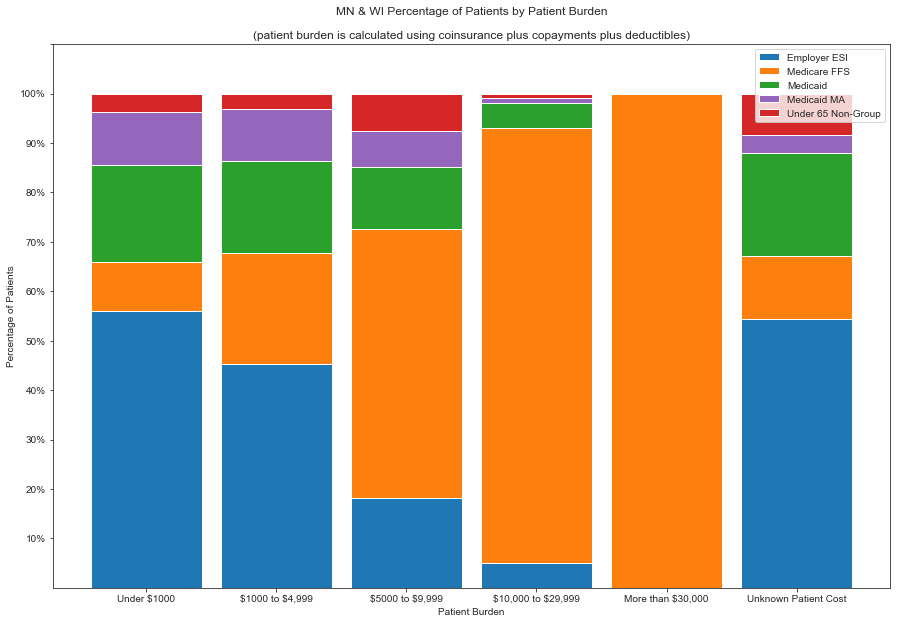

In [281]:
## Create a new figure to plot with
plt.figure(1, figsize = (15, 10))

## Plot each group, stacking them one on top of the other; we label each one so we can distinguish between them
plt.bar(r, mn_blue, color = "tab:blue", edgecolor = "white", width = barwidth, label = "Employer ESI")
plt.bar(r, mn_orange, bottom = mn_blue, color = "tab:orange", edgecolor= "white", width = barwidth, label = "Medicare FFS")
plt.bar(r, mn_green, bottom = [i+j for i,j in zip(mn_blue, mn_orange)], color = "tab:green", edgecolor = "white", width=barwidth, label = "Medicaid")
plt.bar(r, mn_purple, bottom = [i+j+k for i,j,k in zip(mn_blue, mn_orange, mn_green)], color = "tab:purple", edgecolor = "white", width=barwidth, label = "Medicaid MA")
plt.bar(r, mn_red, bottom = [i+j+k+l for i,j,k,l in zip(mn_blue, mn_orange, mn_green, mn_purple)], color = "tab:red", edgecolor = "white", width = barwidth, label = "Under 65 Non-Group")

## Create an axes object so we can change some settings below to provide more clarity on the information being displayed
ax = plt.gca()

ax.set_xticks(x_labs)
ax.set_xticklabels(patient_burden_labels)
ax.set_xlabel("Patient Burden")

ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
ax.set_yticklabels(["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%", " "])
ax.set_ylabel("Percentage of Patients")

ax.tick_params(left = True, bottom = True)

plt.title("MN & WI Percentage of Patients by Patient Burden\n\n(patient burden is calculated using coinsurance plus copayments plus deductibles)")

plt.legend(loc = "upper right")

plt.show()

# <span style="color:#7a0019">B. Visualizing the age distribution of medical populations in Connecticut & New York compared to Minnesota & Wisconsin

In [340]:
### Load in the week 3 SAS Proto output - that has been subset for CT/NY areas and MN/WI areas

ct_potential_patients_df = pd.read_excel(ctny_week3_file)
mn_potential_patients_df = pd.read_excel(mnwi_week3_file)

In [341]:
## Rename our column names

ct_potential_patients_df.columns = df_names
mn_potential_patients_df.columns = df_names

In [345]:
## Convert to more appropriate types for plotting on both dataframes
ct_potential_patients_df = ct_potential_patients_df.astype(conversion_dict)

mn_potential_patients_df = mn_potential_patients_df.astype(conversion_dict)

In [353]:
## Confirm the transformation was successful

ct_potential_patients_df.tail(5)

,Group,Label,All Patients,Employer ESI,Medicare FFS,Medicaid,Medicaid MA,Under 65 Non-Group
17,s_age4564,NaN,6575748,4404113,0,2082266,0,89368
18,s_age65P,NaN,3120963,0,1968622,0,1152341,0
19,s_pros1,Cancer of prostate (not previously diagnosed)=...,0,0,0,0,0,0
20,s_pros2,"Cancer except prostatic diagnosis=1, ELSE 0",298073,119585,84701,36960,55344,1481
21,s_cvdx,"Cardiovascular disease diagnosis=1, ELSE 0",68555,21057,17277,12628,17593,0


In [357]:
## Subset on the Age

ct_age_subset_df = ct_potential_patients_df.iloc[14:19, :]
mn_age_subset_df = mn_potential_patients_df.iloc[14:19, :]

In [359]:
## Show the first subset dataframe

ct_age_subset_df

,Group,Label,All Patients,Employer ESI,Medicare FFS,Medicaid,Medicaid MA,Under 65 Non-Group
14,s_age0018,NaN,3586115,3027996,0,482875,0,75243
15,s_age1934,NaN,4528449,3131478,0,1242824,0,154145
16,s_age3544,NaN,2964619,1905848,0,946584,0,112186
17,s_age4564,NaN,6575748,4404113,0,2082266,0,89368
18,s_age65P,NaN,3120963,0,1968622,0,1152341,0


In [360]:
## Show the second subset dataframe

mn_age_subset_df

,Group,Label,All Patients,Employer ESI,Medicare FFS,Medicaid,Medicaid MA,Under 65 Non-Group
14,s_age0018,NaN,2952767,1850926,0,1040804,0,61036
15,s_age1934,NaN,2321521,1631029,0,565755,0,124736
16,s_age3544,NaN,1552200,1108645,0,359212,0,84342
17,s_age4564,NaN,3463297,2504347,0,637757,0,321192
18,s_age65P,NaN,3119659,0,1857308,0,1262351,0


In [378]:
## Labels for the Ages
ages = ["0 to 18", "19 to 34", "35 to 44", "45 to 64", "65+"]

## Re-initialize x as a new variable with the ages above
x = np.arange(len(ages))

In [368]:
ct_employer_esi = ct_age_subset_df["Employer ESI"]
ct_medicareffs = ct_age_subset_df["Medicare FFS"]
ct_medicaid = ct_age_subset_df["Medicaid"]
ct_medicaid_ma = ct_age_subset_df["Medicaid MA"]
ct_under65 = ct_age_subset_df["Under 65 Non-Group"]

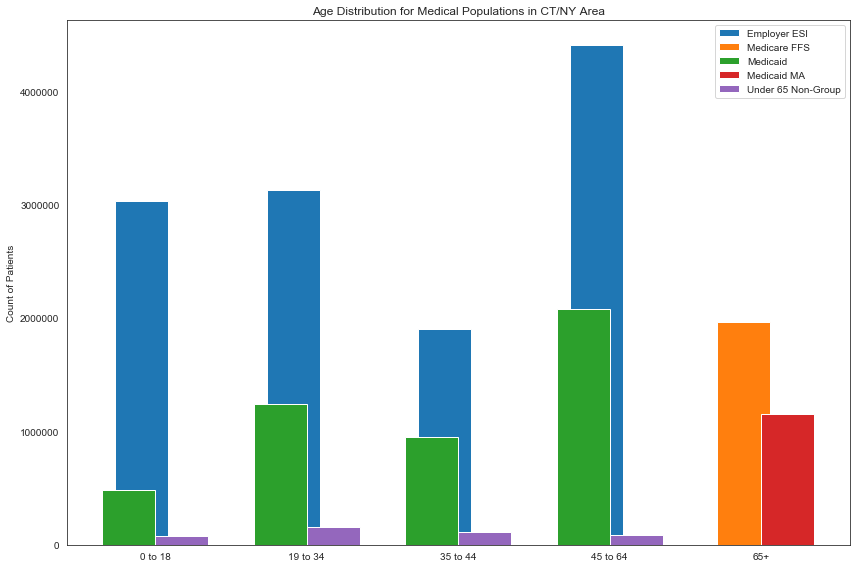

In [384]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Generate a new figure object
fig, ax = plt.subplots(figsize = (12, 8))

## PLot the first bar graph
employer_esi = ax.bar(x - width/4, ct_employer_esi, width, label = "Employer ESI")
medicare_ffs = ax.bar(x - width/3, ct_medicareffs, width, label = "Medicare FFS")
medicaid = ax.bar(x - width/2, ct_medicaid, width, label = "Medicaid")
medicaid_ma = ax.bar(x + width/2, ct_medicaid_ma, width, label = "Medicaid MA")
under65 = ax.bar(x + width/2, ct_under65, width, label = "Under 65 Non-Group")

ax.set_ylabel("Count of Patients")
ax.set_xticks(x)
ax.set_xticklabels(ages)

## Set a descriptive title
plt.title("Age Distribution for Medical Populations in CT/NY Area")
## Set legend for first plot
plt.legend()

fig.tight_layout()

## Show the graph!
plt.show()

## Generate the same plot for the MN & WI population

In [386]:
## Set the same lists of 
mn_employer_esi = mn_age_subset_df["Employer ESI"]
mn_medicareffs = mn_age_subset_df["Medicare FFS"]
mn_medicaid = mn_age_subset_df["Medicaid"]
mn_medicaid_ma = mn_age_subset_df["Medicaid MA"]
mn_under65 = mn_age_subset_df["Under 65 Non-Group"]

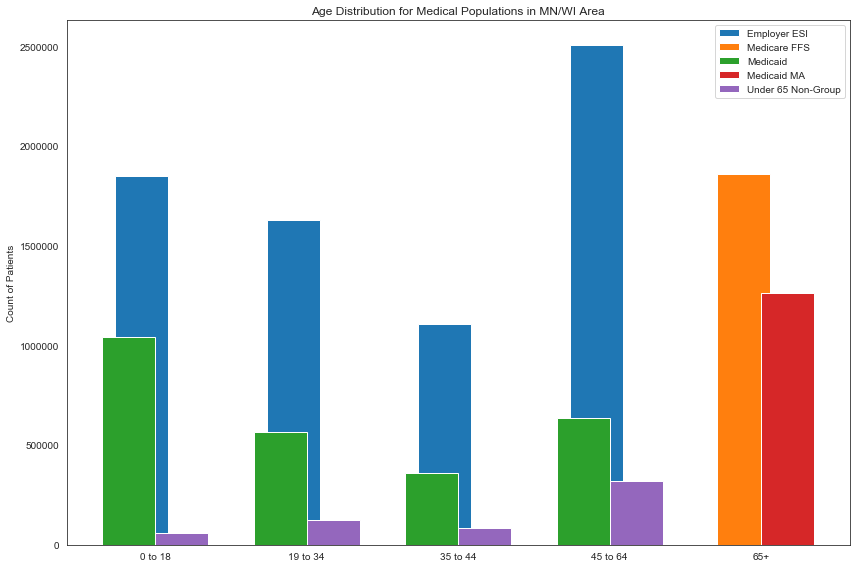

In [387]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Generate a new figure object
fig, ax = plt.subplots(figsize = (12, 8))

## PLot the first bar graph
mn_employer_esi = ax.bar(x - width/4, mn_employer_esi, width, label = "Employer ESI")
mn_medicare_ffs = ax.bar(x - width/3, mn_medicareffs, width, label = "Medicare FFS")
mn_medicaid = ax.bar(x - width/2, mn_medicaid, width, label = "Medicaid")
mn_medicaid_ma = ax.bar(x + width/2, mn_medicaid_ma, width, label = "Medicaid MA")
mn_under65 = ax.bar(x + width/2, mn_under65, width, label = "Under 65 Non-Group")

ax.set_ylabel("Count of Patients")
ax.set_xticks(x)
ax.set_xticklabels(ages)

## Set a descriptive title
plt.title("Age Distribution for Medical Populations in MN/WI Area")
## Set legend for first plot
plt.legend()

fig.tight_layout()

## Show the graph!
plt.show()

# <span style="color:#7a0019">C. Visualizing projected spend in Minnesota health care expenditure (2012 - 2026)

## <span style="color:#7a0019">I went outside of the data provided by the course to help demonstrate the need for doing this type of analysis.  Healthcare costs in Minnesota are rising, so I will create a plot merging data from two articles I reviewed as part of this analysis.

In [18]:
## Generate two lists - one with the years of data capture

years = [2012, 2013, 2014, 2015, 2016, 
         2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026]

## The other list contains historical spending for healthcare in Minnesota, as well as a final projected number
## Spending is expected to reach $94.2 billion dollars by 2026
healthcare_spending = [40.1, 41.5, 44.4, 46.2, 47.1, 
                       np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                      np.nan, np.nan, np.nan, 94.2]

In [19]:
## We will create a dataframe using the data from the two reports provided by Minnesota Department of Health

minnesota_healthcare_df = pd.DataFrame(zip(years, healthcare_spending),
                                      columns = ["Year", "Spend (Billions of Dollars)"])

In [21]:
## We show the dataframe to demonstrate that there are missing values

minnesota_healthcare_df

,Year,Spend (Billions of Dollars)
0,2012,40.1
1,2013,41.5
2,2014,44.4
3,2015,46.2
4,2016,47.1
5,2017,NaN
6,2018,NaN
7,2019,NaN
8,2020,NaN
9,2021,NaN


In [22]:
## We can use a very simple function in Python to fill in the missing values with a linear model
## What will spend be over the years as we travel forward through time?

## We overwrite our original dataframe - after applying the linear model
minnesota_healthcare_df = minnesota_healthcare_df.interpolate(method = "linear")

## Show the new dataframe with filled in values
minnesota_healthcare_df

,Year,Spend (Billions of Dollars)
0,2012,40.10
1,2013,41.50
2,2014,44.40
3,2015,46.20
4,2016,47.10
5,2017,51.81
6,2018,56.52
7,2019,61.23
8,2020,65.94
9,2021,70.65


In [35]:
## One more step - we can calculate the rise of spending by using another helpful Python function
## to get the percent change from one year to the next

minnesota_healthcare_df["Growth"] = round(minnesota_healthcare_df["Spend (Billions of Dollars)"].pct_change() * 100, 2)

## We'll fill in the last empty value with the previous years' growth, which was available from the original article
minnesota_healthcare_df.fillna(3.8, inplace = True)

## Show the final dataframe!
minnesota_healthcare_df

,Year,Spend (Billions of Dollars),Growth
0,2012,40.10,3.80
1,2013,41.50,3.49
2,2014,44.40,6.99
3,2015,46.20,4.05
4,2016,47.10,1.95
5,2017,51.81,10.00
6,2018,56.52,9.09
7,2019,61.23,8.33
8,2020,65.94,7.69
9,2021,70.65,7.14


In [73]:
## Save each item that we need to generate the plot to new lists

## Create a list using the years in the dataframe we created above
## We also create labels by transforming them into a string
years = minnesota_healthcare_df["Year"]
year_labels = [str(i) for i in years]

## We create another list using the spending we generated in the dataframe above
## In a similar step, we create labels by transforming the values into string format
healthcare_spending = minnesota_healthcare_df["Spend (Billions of Dollars)"]
spending_labels = ["$" + str(round(i,1)) for i in minnesota_healthcare_df["Spend (Billions of Dollars)"]]

## Another list!  This time to show the growth, which was generated above
## And then generate a list of numbers to set the positions for each label
## And then generate the new labels
growth = minnesota_healthcare_df["Growth"]
growth_y_ticks = list(np.arange(len(growth)))
growth_y_labels = [str(i) + "%" for i in np.arange(0, 14, 1)]

## Finally, set the labels for Spending column
spend_y_ticks = ["$" + str(i) for i in np.arange(0, 100, step = 5)]

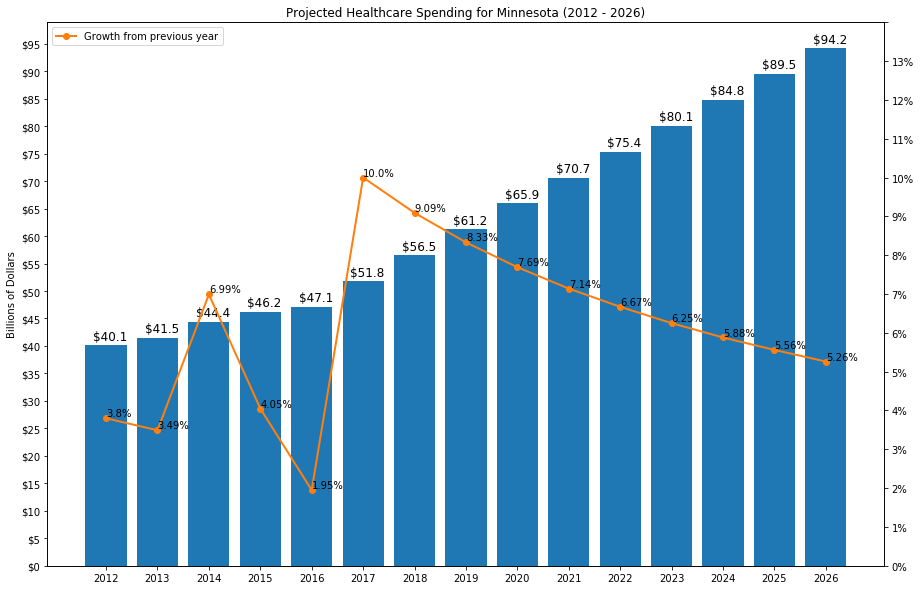

In [83]:
## Generate a new figure object
plt.figure(1, figsize = (15, 10))

## Plot the first type / subtype combination
plt.bar(years, healthcare_spending, color ="tab:blue", label = "Spending (Billions)")
plt.yticks(np.arange(0, 100, step = 5), spend_y_ticks)
## Change the y-label for better descriptive text
plt.ylabel("Billions of Dollars")

for i  in range(len(years)):
    plt.text(x = years[i] - 0.25,
            y = healthcare_spending[i] + 1,
            s = spending_labels[i], size = 12)

axes2 = plt.twinx()
axes2.plot(years, growth, "-o", color = "tab:orange", label = "Growth from previous year", lw = 2)
axes2.set_yticks(growth_y_ticks)
axes2.set_yticklabels(growth_y_labels)

for x, y in zip(years, growth):
    axes2.text(x, y+.05, str(y)+"%")

plt.xlabel(year_labels)

## Set a descriptive title
plt.title("Projected Healthcare Spending for Minnesota (2012 - 2026)")
## Set legend for first plot
plt.legend(loc = "upper left")

## Create an axes object for the next step
ax = plt.gca()
ax.set_xticks(years)

## Show the graph!
plt.show()

## <span style="color:#ffcc33">Thank you for reading my analysis!